# **IT Risk assessment calculation in a quantum computer example**

# Example 3: probablity, impact, dependencies

## Step 1: Imports and connection with IBM quantum services

In [1]:
import qiskit
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from collections import Counter  
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt  

In [2]:
# Initialize Qiskit Runtime Service
service = QiskitRuntimeService(channel="ibm_quantum")

## Step 2: Data definiton

### Risk matrix for 10 assets (Ax) and 10 threats (Tx)

In [3]:
# Assets:
#   Web Server (A1)
#   Database (A2)
#   File Server (A3)
#   Application Server (A4)
#   Email Server (A5)
#   Backup Server (A6)
#   HR Database (A7)
#   Finance Database (A8)
#   Customer Portal (A9)
#   Internal Network (A10)
#
# [A1,A2,A3,A4,A5,A6,A7,A8,A9,A10]
#
# 
# Asset names
asset_names = [
    "Web\nServer", "Database", "File\nServer", "Application\nServer", 
    "Email\nServer", "Backup\nServer", "HR\nDatabase", "Finance\nDatabase", 
    "Customer\nPortal", "Internal\nNetwork"
]
# Threats:
#
# T1: SQL Injection
# T2: DDoS Attack
# T3: Data Exfiltration
# T4: Phishing Attack
# T5: Insider Threat
# T6: Ransomware
# T7: Zero-Day Exploit
# T8: Man-in-the-Middle Attack
# T9: Brute Force Attack
# T10: Malware Injection
#
#
probability_matrix = np.array([
    [0.8, 0.6, 0.0, 0.2, 0.1, 0.3, 0.4, 0.5, 0.2, 0.1],  # T1: SQL Injection
    [0.7, 0.2, 0.1, 0.0, 0.3, 0.5, 0.2, 0.4, 0.3, 0.2],  # T2: DDoS Attack
    [0.1, 0.4, 0.5, 0.3, 0.2, 0.6, 0.1, 0.0, 0.4, 0.3],  # T3: Data Exfiltration
    [0.3, 0.1, 0.2, 0.5, 0.4, 0.2, 0.3, 0.1, 0.3, 0.5],  # T4: Phishing Attack
    [0.4, 0.3, 0.2, 0.0, 0.5, 0.1, 0.4, 0.6, 0.2, 0.1],  # T5: Insider Threat
    [0.2, 0.5, 0.3, 0.1, 0.4, 0.7, 0.3, 0.2, 0.6, 0.4],  # T6: Ransomware
    [0.6, 0.2, 0.4, 0.3, 0.0, 0.3, 0.5, 0.2, 0.1, 0.6],  # T7: Zero-Day Exploit
    [0.5, 0.4, 0.3, 0.6, 0.2, 0.3, 0.2, 0.5, 0.4, 0.2],  # T8: Man-in-the-Middle Attack
    [0.3, 0.6, 0.4, 0.2, 0.5, 0.2, 0.6, 0.1, 0.3, 0.7],  # T9: Brute Force Attack
    [0.4, 0.3, 0.5, 0.4, 0.6, 0.2, 0.3, 0.4, 0.5, 0.6]   # T10: Malware Injection
])

# Impact matrix for 10 assets and 10 threats
impact_matrix = np.array([
    [0.9, 0.8, 0.3, 0.7, 0.5, 0.4, 0.6, 0.9, 0.7, 0.5],  # T1: SQL Injection
    [0.6, 0.5, 0.4, 0.3, 0.7, 0.8, 0.6, 0.5, 0.8, 0.6],  # T2: DDoS Attack
    [0.4, 0.7, 0.8, 0.5, 0.6, 0.7, 0.4, 0.3, 0.8, 0.7],  # T3: Data Exfiltration
    [0.7, 0.3, 0.5, 0.8, 0.4, 0.5, 0.7, 0.2, 0.6, 0.8],  # T4: Phishing Attack
    [0.5, 0.6, 0.4, 0.2, 0.9, 0.3, 0.8, 0.9, 0.6, 0.3],  # T5: Insider Threat
    [0.3, 0.7, 0.5, 0.4, 0.6, 0.9, 0.5, 0.4, 0.8, 0.5],  # T6: Ransomware
    [0.8, 0.4, 0.6, 0.5, 0.3, 0.4, 0.9, 0.3, 0.2, 0.9],  # T7: Zero-Day Exploit
    [0.5, 0.6, 0.5, 0.7, 0.5, 0.4, 0.6, 0.8, 0.7, 0.4],  # T8: Man-in-the-Middle Attack
    [0.6, 0.8, 0.6, 0.4, 0.7, 0.3, 0.7, 0.4, 0.5, 0.9],  # T9: Brute Force Attack
    [0.7, 0.4, 0.8, 0.6, 0.9, 0.5, 0.5, 0.6, 0.8, 0.8]   # T10: Malware Injection
])



### Add dependencies values between assets

In [4]:
# Adjacency matrix definition

adjacency_matrix = np.array([
    [0.0, 0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2],  # A1 depends on A2 and A10
    [0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0],  # A2 depends on A4 and A9
    [0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.0, 0.0],  # A3 depends on A1 and A8
    [0.0, 0.2, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4],  # A4 depends on A2, A3 and A10
    [0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0],  # A5 depends on A1 and A8
    [0.0, 0.3, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],  # A6 depends on A2 and A3
    [0.0, 0.0, 0.0, 0.4, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0],  # A7 depends on A4 and A8
    [0.0, 0.1, 0.3, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0],  # A8 depends on A2, A3 and A5
    [0.3, 0.3, 0.0, 0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],  # A9 depends on A1, A2 and A4
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.3, 0.0]   # A10 depends on A7 and A9
])


### Create graph of dependencies between assetts

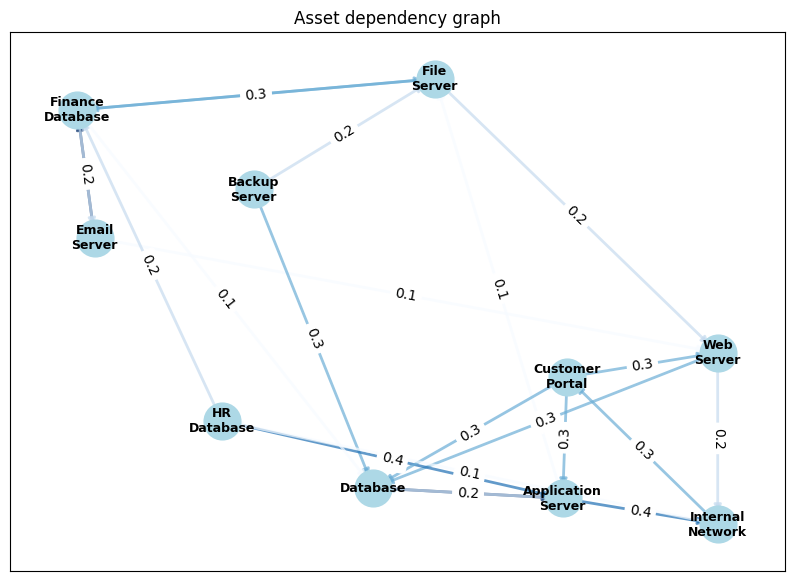

In [5]:

G = nx.DiGraph()
G.add_nodes_from(asset_names)

# Add edges to the graph with the weights of adjacency matrix
for i in range(adjacency_matrix.shape[0]):
    for j in range(adjacency_matrix.shape[1]):
        if adjacency_matrix[i, j] > 0:
            G.add_edge(asset_names[i], asset_names[j], weight=adjacency_matrix[i, j])

# Draw graph
pos = nx.spring_layout(G, seed=42)
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]

plt.figure(figsize=(10, 7))
nx.draw_networkx_nodes(G, pos, node_size=700, node_color="lightblue")
nx.draw_networkx_edges(G, pos, edgelist=edges, width=2, alpha=0.7, edge_color=weights, edge_cmap=plt.cm.Blues)
nx.draw_networkx_labels(G, pos, labels={node: node for node in asset_names}, font_size=9, font_weight="bold")

# Add weights to the edges
edge_labels = {(u, v): f"{d['weight']:.1f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Asset dependency graph")
plt.show()


## Step 3: Now entering in Quantum Realm...

### Define the number of assets and create the quantum circuit

In [6]:
num_assets = len(asset_names)
qr = QuantumRegister(num_assets, 'q')
cr = ClassicalRegister(num_assets, 'c')
qc = QuantumCircuit(qr, cr)
print("Number of assets =",num_assets)

Number of assets = 10


### Apply Hadamard gates to put the qubits in superposition

In [7]:
for i in range(num_assets):
    qc.h(qr[i])

### Calculate risk matrix

In [8]:
risk_matrix = probability_matrix * impact_matrix

print(risk_matrix)

[[0.72 0.48 0.   0.14 0.05 0.12 0.24 0.45 0.14 0.05]
 [0.42 0.1  0.04 0.   0.21 0.4  0.12 0.2  0.24 0.12]
 [0.04 0.28 0.4  0.15 0.12 0.42 0.04 0.   0.32 0.21]
 [0.21 0.03 0.1  0.4  0.16 0.1  0.21 0.02 0.18 0.4 ]
 [0.2  0.18 0.08 0.   0.45 0.03 0.32 0.54 0.12 0.03]
 [0.06 0.35 0.15 0.04 0.24 0.63 0.15 0.08 0.48 0.2 ]
 [0.48 0.08 0.24 0.15 0.   0.12 0.45 0.06 0.02 0.54]
 [0.25 0.24 0.15 0.42 0.1  0.12 0.12 0.4  0.28 0.08]
 [0.18 0.48 0.24 0.08 0.35 0.06 0.42 0.04 0.15 0.63]
 [0.28 0.12 0.4  0.24 0.54 0.1  0.15 0.24 0.4  0.48]]


### Apply risk-based rotations based on the risk matrix

In [9]:
for i in range(risk_matrix.shape[0]):  # For each threat
    for j in range(num_assets):  # For each asset
        if risk_matrix[i][j] > 0:
            qc.ry(2 * np.arcsin(np.sqrt(risk_matrix[i][j])), qr[j])

### Draw the partial quantum circuit

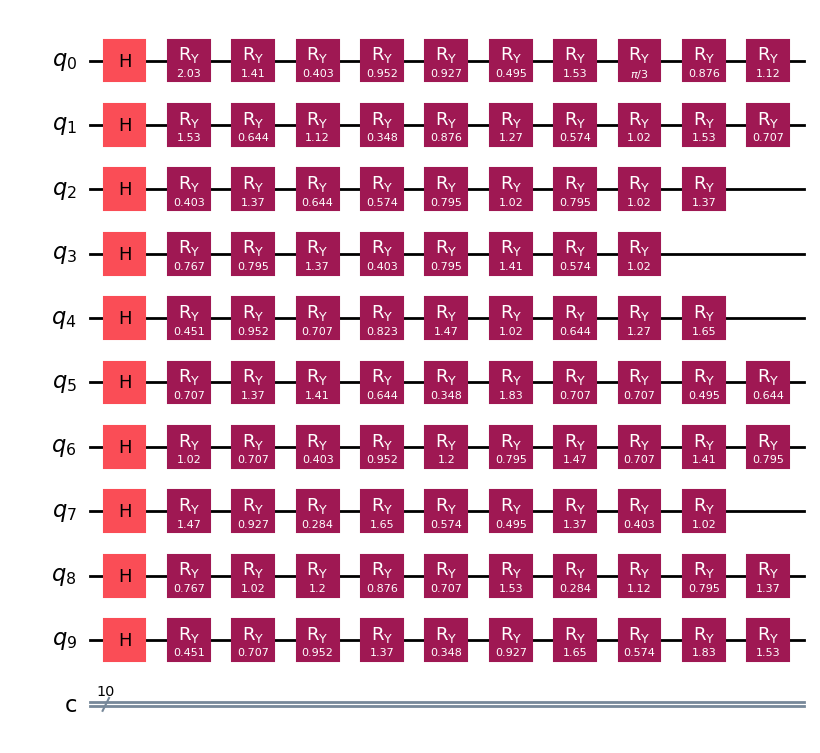

In [10]:
qc.draw(output="mpl")

## Incorporate Dependencies to the quantum circuit using Adjacency Matrix

### Apply controlled rotations based on dependencies from the adjacency matrix

In [11]:
for i in range(num_assets):  # Control qubit
    for j in range(num_assets):  # Target qubit
        if adjacency_matrix[i, j] > 0:
            dependency_theta = 2 * np.arcsin(np.sqrt(adjacency_matrix[i, j]))
            qc.cry(dependency_theta, qr[i], qr[j])  # Controlled rotation based on dependency

# Measure all qubits
qc.measure(qr, cr)


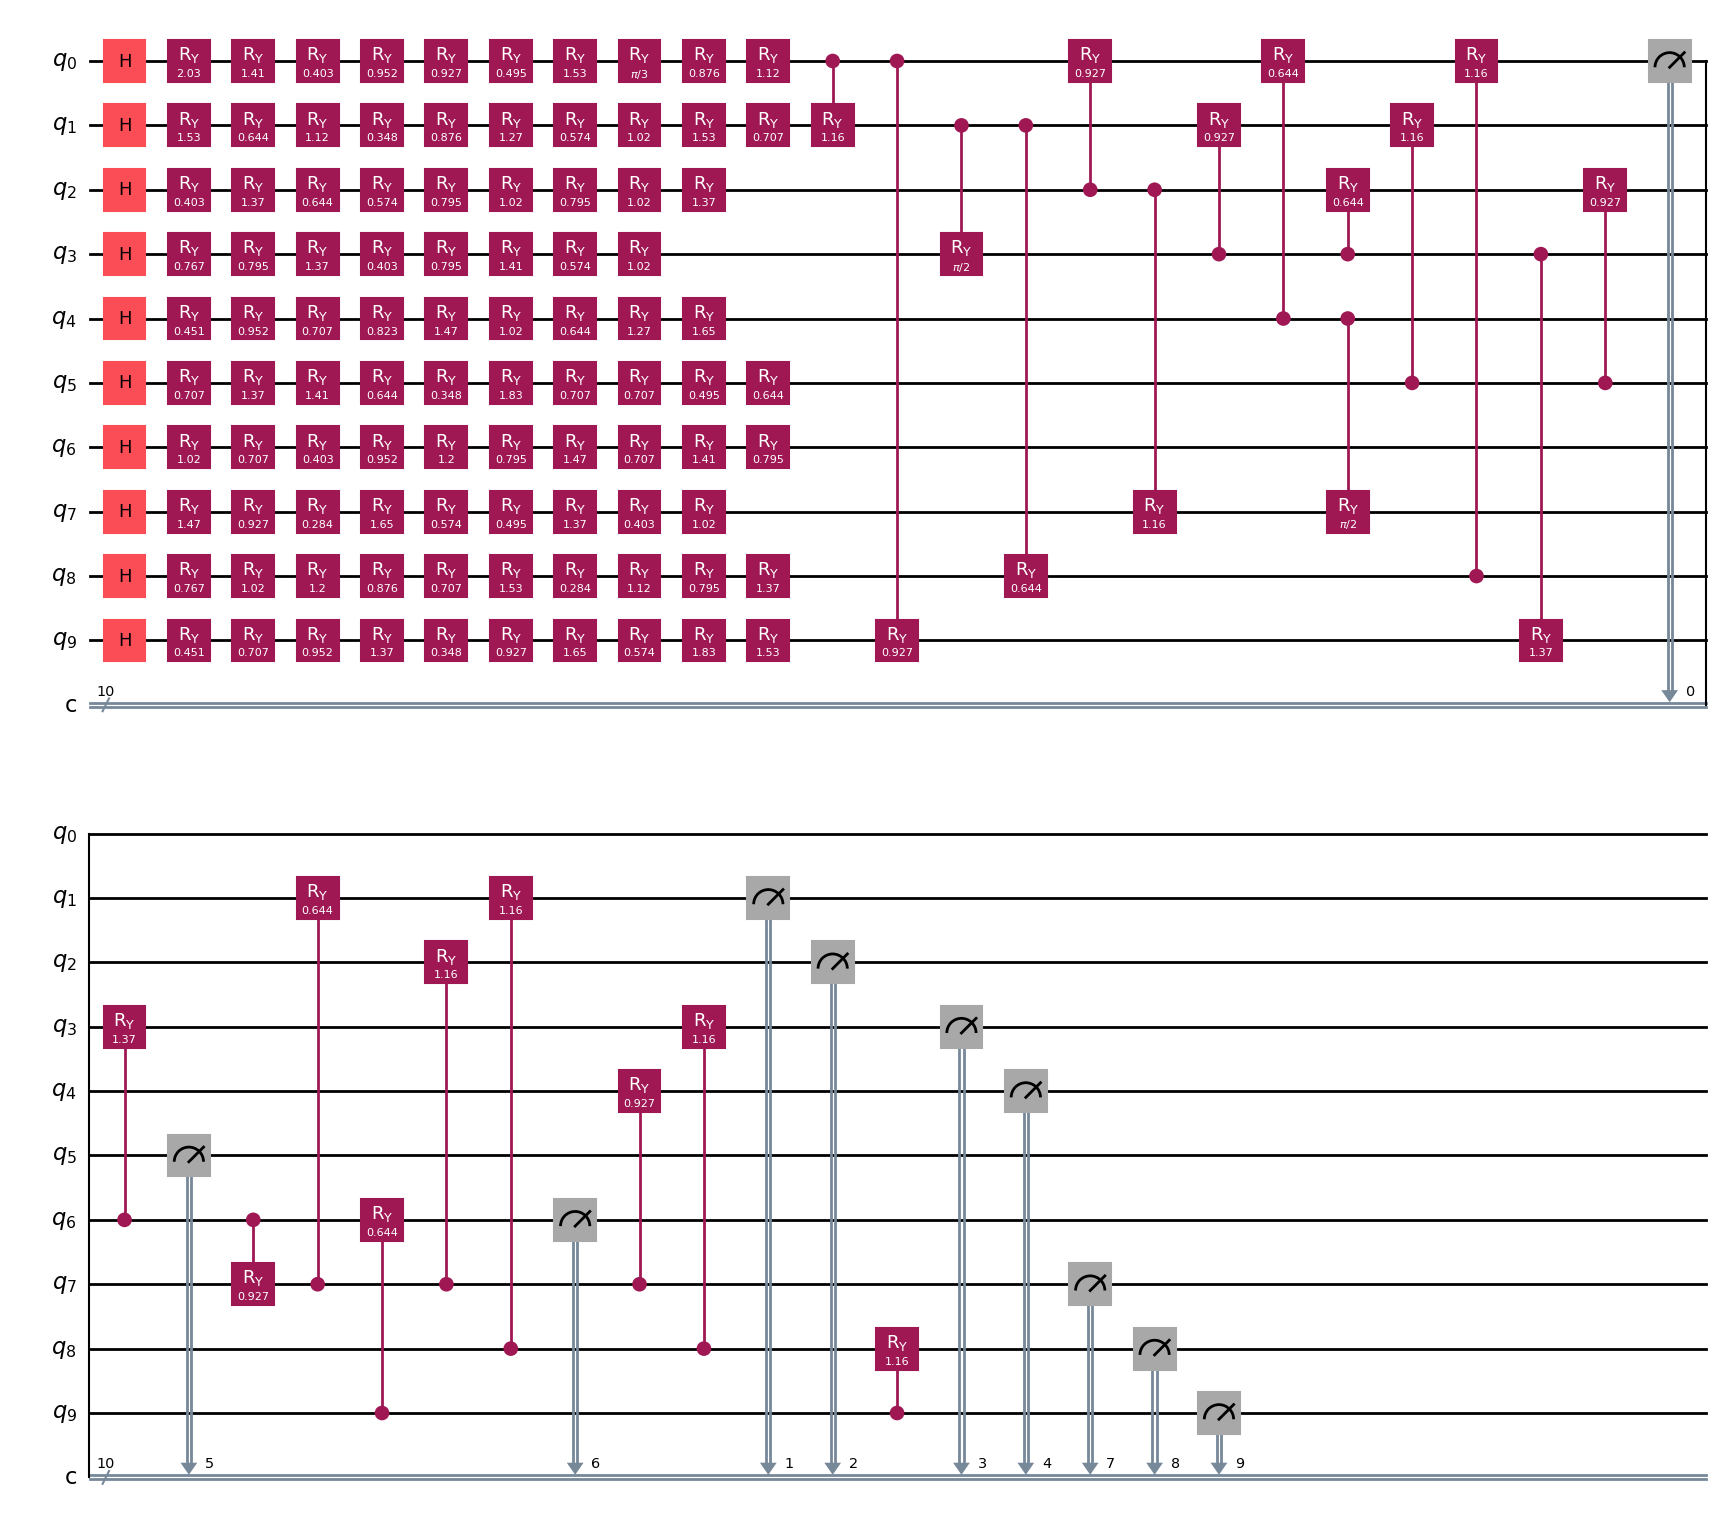

In [12]:
# Draw the full quantum circuit
qc.draw(output="mpl")

### Backend selecton

In [13]:
backend = service.backend(name="ibm_brisbane")
# backend = service.backend(name="ibm_kyiv")
# backend = service.backend(name="ibm_sherbrooke")

### Transpile the quantum circuit for the selected backend

In [14]:
transpiled_circuit = transpile(qc, backend=backend)

### Directly run the transpiled circuit on the backend

In [15]:
# If not specifying the number of shots, the default is 1024
shots = 1024

# job = backend.run(transpiled_circuit, shots=shots)
job = backend.run(transpiled_circuit)
job_id = job.job_id()
print(job_id)

result = job.result()

/tmp/ipykernel_4007/1751882231.py:5: DeprecationWarning: backend.run() and related sessions methods are deprecated  as of qiskit-ibm-runtime 0.23 and will be removed no sooner than 6 months after the release date. More details can be found in the primitives migration guide https://docs.quantum.ibm.com/migration-guides/qiskit-runtime.
  job = backend.run(transpiled_circuit)


cwvty7r997wg008xx0mg


# MAYDAY!!! MAYDAY!!!

In [61]:
job.cancel()

### Get the result counts

In [17]:
counts = result.get_counts()
print("Simulation Result:", counts)
print("Length of counts",len(counts))

Simulation Result: {'1100001001': 3, '1101111101': 2, '1010101101': 2, '0011101100': 2, '0101011101': 13, '1001111000': 3, '1010010001': 9, '1011101011': 2, '1101100000': 1, '0110100100': 1, '0000011011': 3, '1111001011': 3, '0000100000': 2, '1101100101': 2, '1001001010': 2, '0101111111': 9, '0111010001': 10, '1010001100': 1, '1001100110': 1, '0000111101': 5, '1100100001': 6, '1111011111': 1, '0010000110': 4, '1000001001': 9, '1000111001': 7, '1000111111': 5, '0000101011': 5, '0111001101': 4, '1000101101': 6, '0010010010': 4, '0001000010': 4, '1001001110': 1, '0110000000': 7, '1111111011': 1, '0111010010': 5, '0010100111': 6, '0110111010': 2, '0110000010': 6, '0010110100': 5, '0111000011': 7, '0010100110': 6, '1010001011': 9, '1010001010': 7, '0100110001': 10, '0001111110': 8, '1100110101': 4, '1011100000': 4, '0100010111': 4, '0001000111': 5, '1101101000': 2, '0001101100': 9, '1001101110': 4, '0010110000': 4, '0011111011': 5, '1101000000': 1, '0000101000': 3, '1001100001': 4, '1010100

### Calculate risks per asset

In [18]:
asset_risks = [0] * len(next(iter(counts)))

for bitstring, frequency in counts.items():
    for i, bit in enumerate(bitstring):
        if bit == '1':
            asset_risks[i] += frequency / shots

# Truncate to 2 decimals 
asset_risks_truncated = [round(x, 2) for x in asset_risks]

# Print the cumulative risk vector
print("Cumulative Risk per Asset:", asset_risks_truncated)

# Cumulative Risk per Asset: [1.12, 1.68, 2.07, 1.97, 2.89, 1.67, 2.62, 2.26, 1.98, 1.73]
# Cumulative Risk per Asset: [1.23, 1.91, 0.92, 1.89, 2.14, 2.83, 2.11, 2.32, 1.51, 1.98]


Cumulative Risk per Asset: [1.21, 1.53, 1.68, 2.0, 1.91, 2.03, 1.9, 1.57, 1.64, 2.29]


### Plot the bar chart

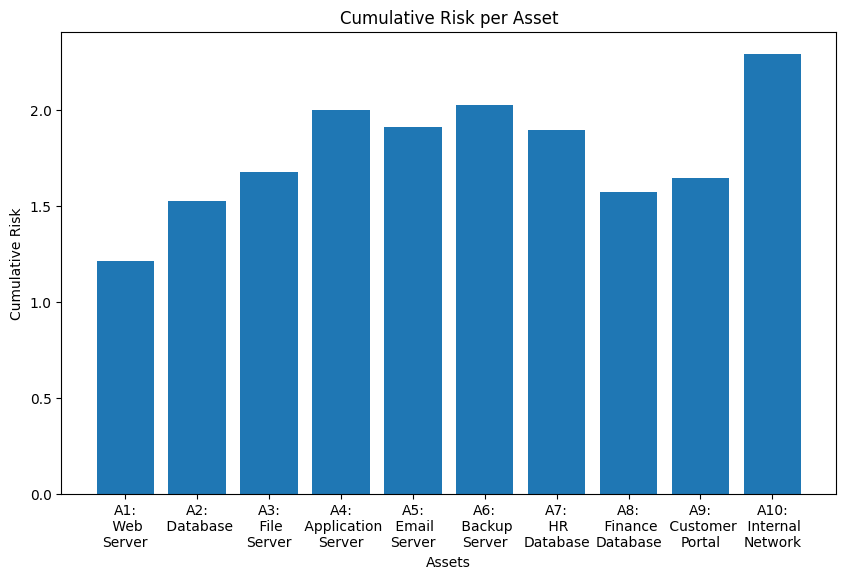

In [19]:
# Generate labels for each asset as "A(x): Asset Name"
tick_labels = [f"A{i+1}:\n {asset_names[i]}" for i in range(len(asset_names))]

plt.figure(figsize=(10, 6))
plt.bar(range(len(asset_risks)), asset_risks, tick_label=tick_labels)
plt.title("Cumulative Risk per Asset")
plt.xlabel("Assets")
plt.ylabel("Cumulative Risk")
plt.show()


### Create graph of Assett Risks

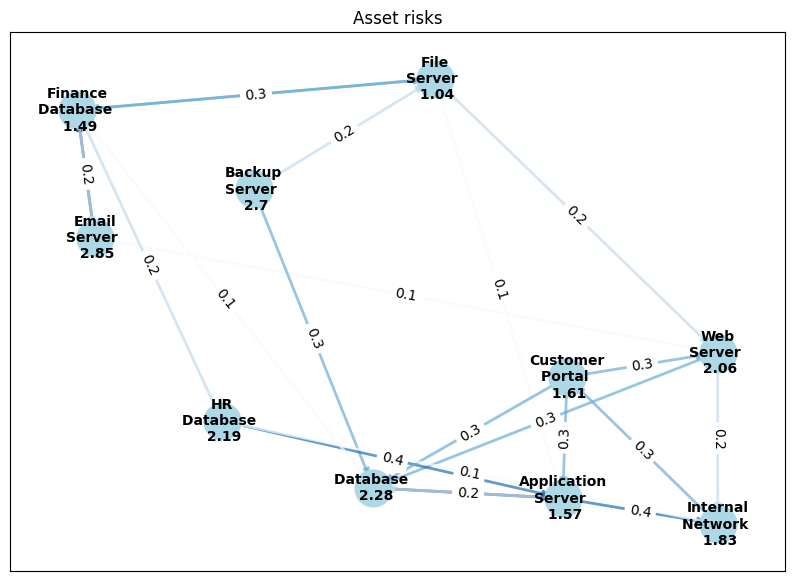

In [69]:
G = nx.DiGraph()
G.add_nodes_from(asset_names)

# Añadir aristas al grafo con los pesos de la matriz de adyacencia
for i in range(adjacency_matrix.shape[0]):
    for j in range(adjacency_matrix.shape[1]):
        if adjacency_matrix[i, j] > 0:
            G.add_edge(asset_names[i], asset_names[j], weight=adjacency_matrix[i, j])

# Preparar etiquetas de nodos que incluyan el nombre y el riesgo
node_labels = {asset_names[i]: f"{asset_names[i]} \n {asset_risks_truncated[i]}" for i in range(len(asset_names))}

# Dibujar el grafo
pos = nx.spring_layout(G, seed=42)
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]

plt.figure(figsize=(10, 7))
nx.draw_networkx_nodes(G, pos, node_size=700, node_color="lightblue")
nx.draw_networkx_edges(G, pos, edgelist=edges, width=2, alpha=0.7, edge_color=weights, edge_cmap=plt.cm.Blues)
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_weight="bold")

# Agregar etiquetas a las aristas con los pesos de dependencia
edge_labels = {(u, v): f"{d['weight']:.1f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Asset risks")
plt.show()